In [48]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("./Default1.xlsx")
display(data)

,Unnamed: 0,default,student,balance,income
0,1,No,Yes,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879
...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.378914
9996,9997,No,No,757.962918,19660.721768
9997,9998,No,No,845.411989,58636.156984
9998,9999,No,No,1569.009053,36669.112365


In [7]:
display(data.isnull().sum())

Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64

In [8]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


None

In [9]:
display(data.describe())

,Unnamed: 0,balance,income
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,835.374886,33516.981876
std,2886.89568,483.714985,13336.639563
min,1.00000,0.000000,771.967729
25%,2500.75000,481.731105,21340.462903
50%,5000.50000,823.636973,34552.644802
75%,7500.25000,1166.308386,43807.729272
max,10000.00000,2654.322576,73554.233495


In [10]:
data.describe(include='all')

,Unnamed: 0,default,student,balance,income
count,10000.00000,10000,10000,10000.000000,10000.000000
unique,NaN,2,2,NaN,NaN
top,NaN,No,No,NaN,NaN
freq,NaN,9667,7055,NaN,NaN
mean,5000.50000,NaN,NaN,835.374886,33516.981876
std,2886.89568,NaN,NaN,483.714985,13336.639563
min,1.00000,NaN,NaN,0.000000,771.967729
25%,2500.75000,NaN,NaN,481.731105,21340.462903
50%,5000.50000,NaN,NaN,823.636973,34552.644802
75%,7500.25000,NaN,NaN,1166.308386,43807.729272


In [13]:
(data.balance == 0).sum()

499

In [15]:
data.student.value_counts()

No     7055
Yes    2945
Name: student, dtype: int64

In [16]:
data.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [20]:
data['default2'] = data.default.factorize()[0]
data['student2'] = data.student.factorize()[0]
data.head(5)

,Unnamed: 0,default,student,balance,income,default2,student2
0,1,No,Yes,729.526495,44361.625074,0,0
1,2,No,Yes,817.180407,12106.134700,0,0
2,3,No,No,1073.549164,31767.138947,0,1
3,4,No,No,529.250605,35704.493935,0,1
4,5,No,No,785.655883,38463.495879,0,1


In [24]:
data_dfno = data[data.default2 == 0].sample(frac = 0.15)
data_dfyes = data[data.default2 == 1]
data_df = data_dfno.append(data_dfyes)
data_df.head(3)

C:\Users\student\AppData\Local\Temp\ipykernel_15444\3594775099.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_dfno.append(data_dfyes)


,Unnamed: 0,default,student,balance,income,default2,student2
8639,8640,No,No,1356.729836,37664.037389,0,1
2137,2138,No,No,1629.325936,44911.643530,0,1
8721,8722,No,No,1522.530802,30765.563796,0,1


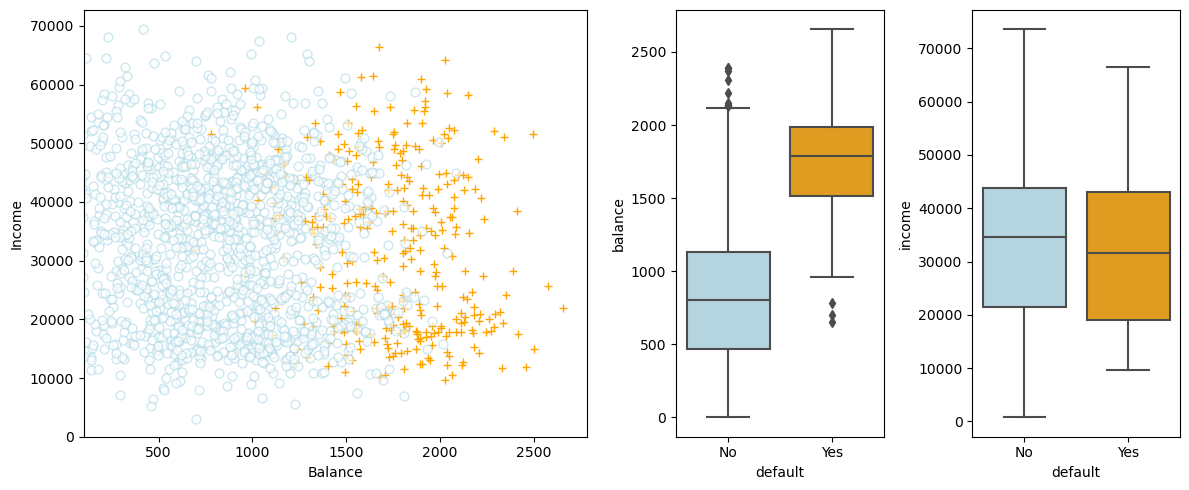

In [51]:
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1,4)
ax1 = plt.subplot(gs[0,:2])
ax2 = plt.subplot(gs[0,2:3])
ax3 = plt.subplot(gs[0,3:4])

ax1.scatter(data_df[data_df.default == 'Yes'].balance, data_df[data_df.default == 'Yes'].income, s=40,c='orange', marker='+', linewidth=1)
ax1.scatter(data_df[data_df.default == 'No'].balance, data_df[data_df.default == 'No'].income, s=40, marker='o', linewidth=1, edgecolors='lightblue', facecolors='white', alpha=.6)

ax1.set_ylim(ymin = 0)
ax1.set_ylabel('Income')
ax1.set_xlim(xmin = 100)
ax1.set_xlabel('Balance')

c_palette = {'No': 'lightblue', 'Yes': 'orange'}

sns.boxplot(x=data['default'], y=data['balance'], data=data, orient='v', ax=ax2, palette=c_palette)
sns.boxplot(x=data['default'], y=data['income'], data=data, orient='v', ax=ax3, palette=c_palette)

gs.tight_layout(plt.gcf())
plt.show()